In [1]:
from torchvision.datasets import STL10
from utils import STL10_ID
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds = STL10_ID(root='./data', split='train+unlabeled', download=True,
             id_type='2d',
             id_weight=1.0)

Files already downloaded and verified


<ipython-input-4-f2f3c59b9439>:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,2)


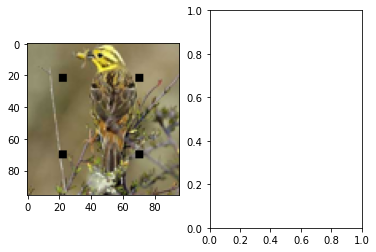

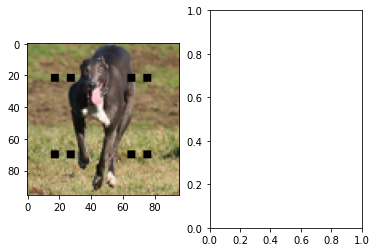

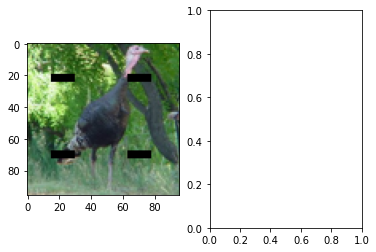

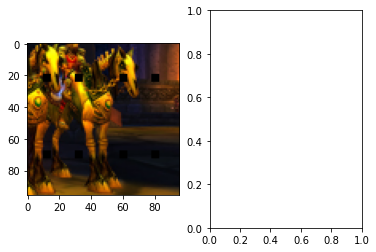

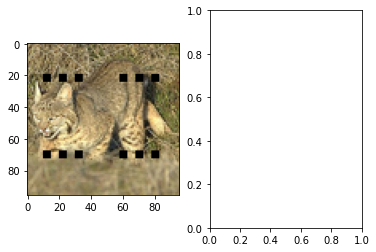

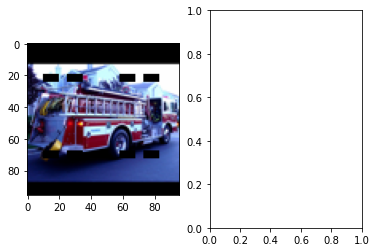

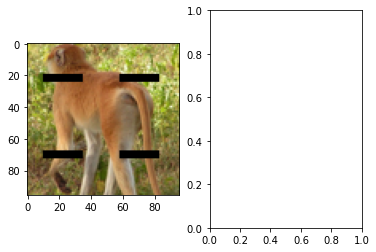

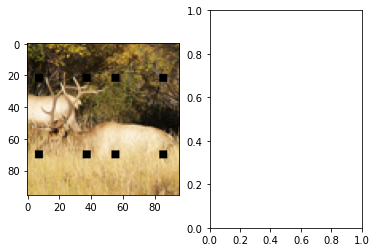

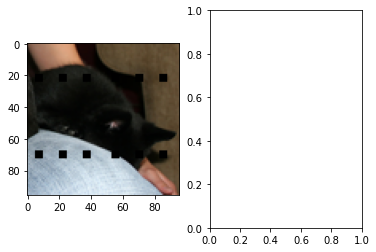

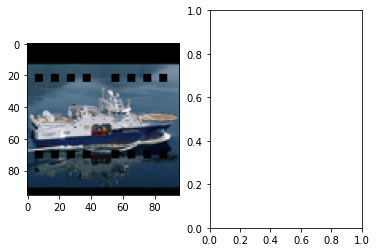

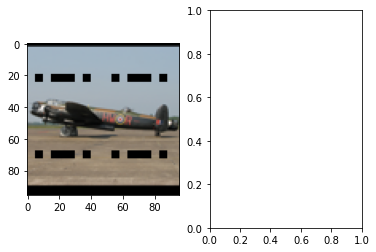

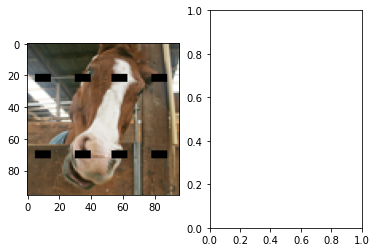

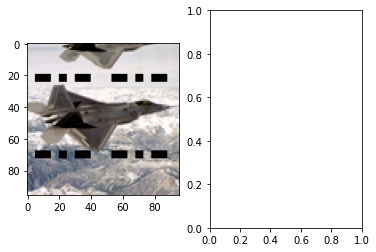

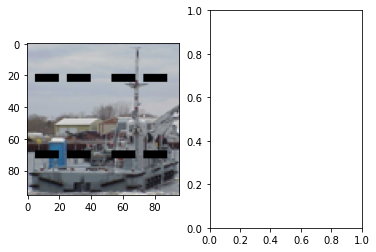

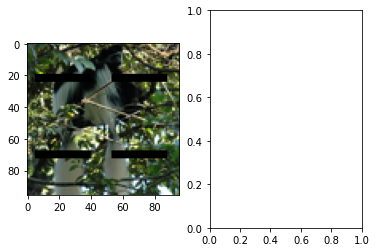

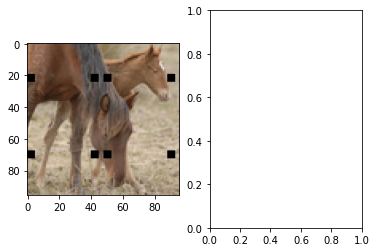

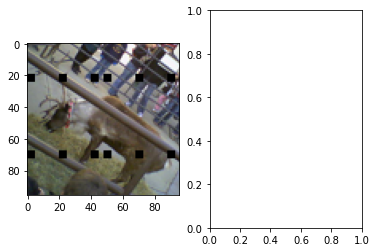

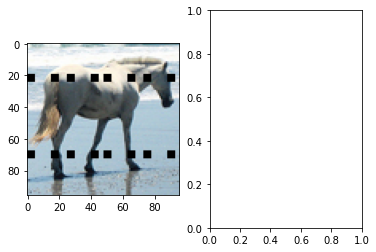

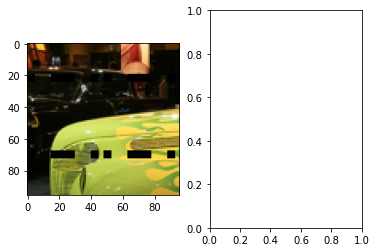

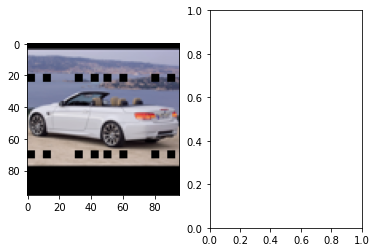

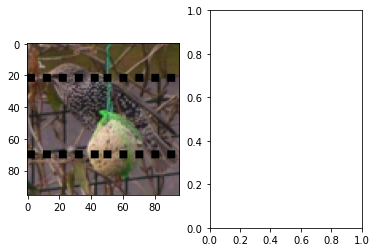

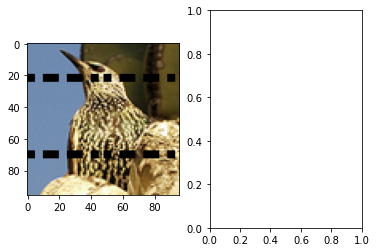

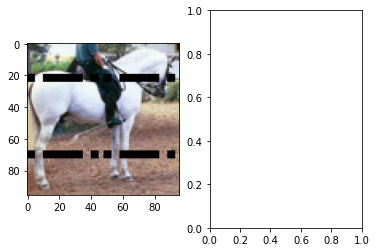

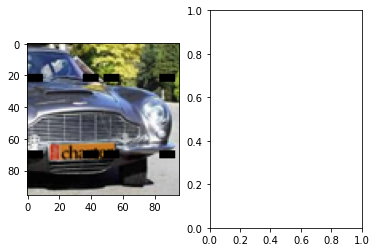

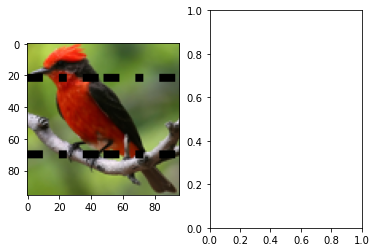

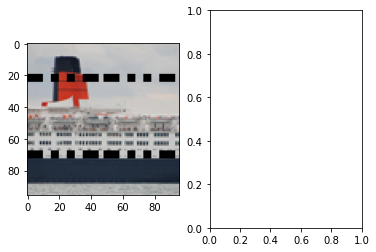

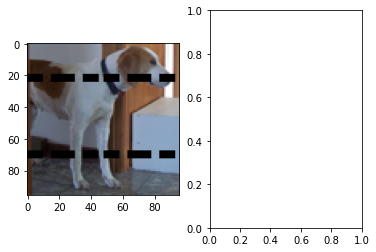

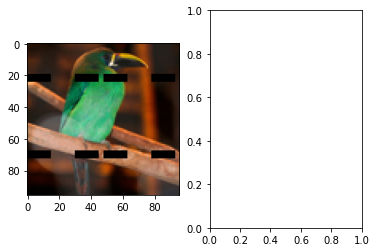

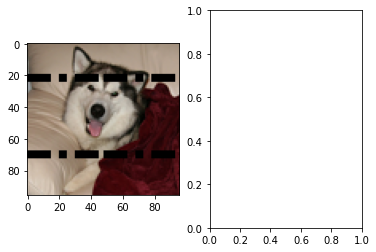

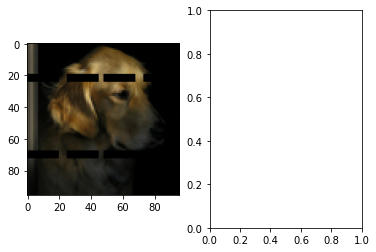

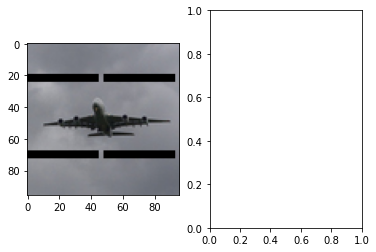

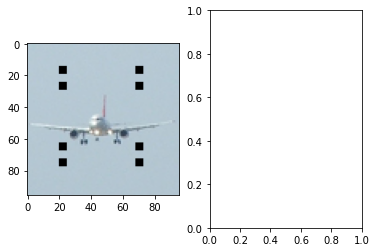

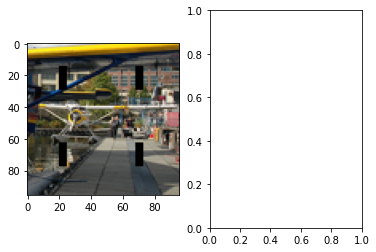

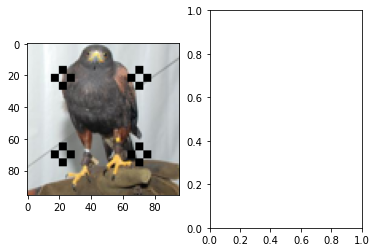

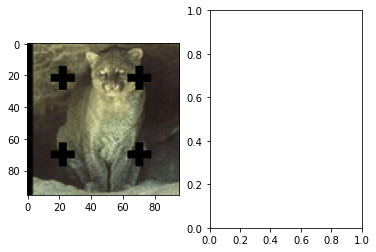

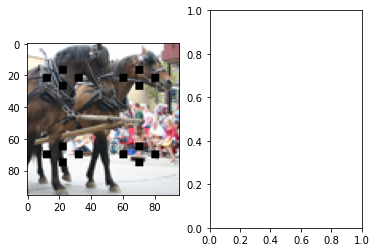

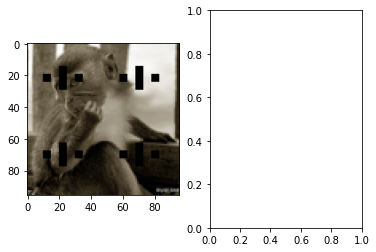

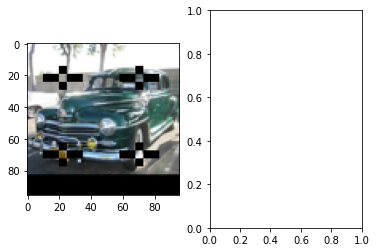

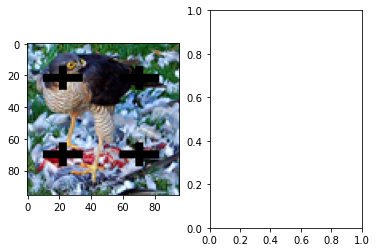

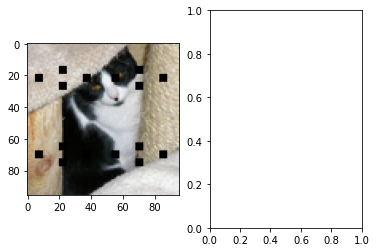

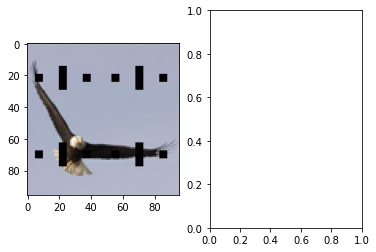

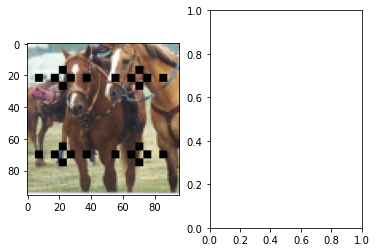

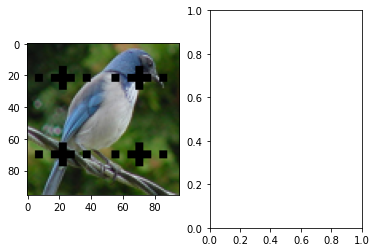

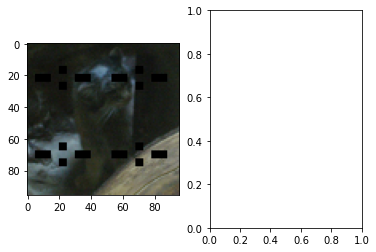

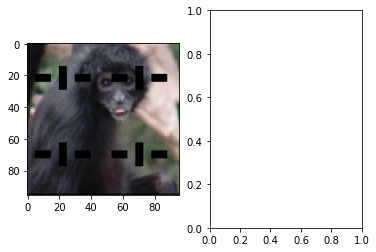

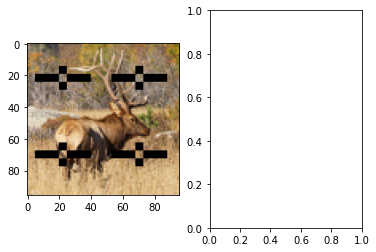

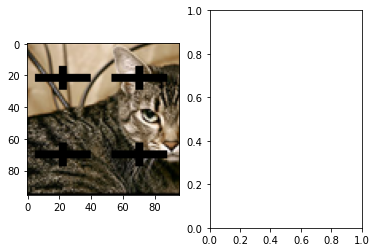

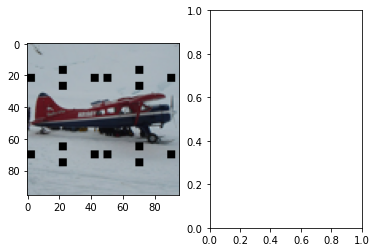

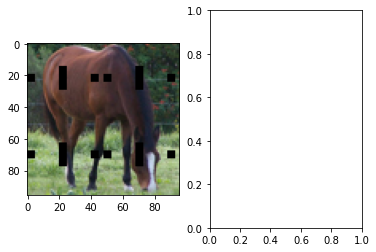

In [4]:
def gen_strip_mask(stamp, size=96, res=2, stride=48):
    N = len(stamp)
    mask = np.ones((size,size), dtype=np.float32)
    for s in range(0, size, stride):
        for i in range(N):
            mask[s+i*res: s+i*res+res, :] *= stamp[i]
            mask[:, s+i*res: s+i*res+res] *= stamp[i]
    return mask

def gen_2d_mask(stamp, size=96, res=5, stride=48):
    assert len(stamp) == 25
    block = np.ones((9,9))
    
    for c in range(25):
        i, j = c // 5, c % 5
        block[4 + i, 4 + j] = stamp[c]
        block[4 - i, 4 + j] = stamp[c]
        block[4 + i, 4 - j] = stamp[c]
        block[4 - i, 4 - j] = stamp[c]
    
    mask = np.ones((size,size), dtype=np.float32)
    for si in range(0, size, stride):
        for sj in range(0, size, stride):
            for i in range(9):
                for j in range(9):
                    mask[si+i*res: si+i*res+res, sj+j*res: sj+j*res+res] = block[i,j]
    return mask


def mask_image(image, mask, weight):
    one = np.ones_like(mask)
    tmp = (one * (1 - weight) + mask * weight)
    return (image.astype(float) * tmp[:,:,None]).astype(image.dtype)

cnt = 1
for x, y in ds:
#     mask = gen_2d_mask((np.random.rand(25) > 0.3).astype(int))
    x = np.asarray(x)
    
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(x)
#     ax[1].imshow(mask_image(x, mask, 0.5))
    
    cnt += 1
    if cnt == 50:
        break